In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
sns.set_style('whitegrid')

In [3]:
border_cross = pd.read_csv('Border_Crossing_Entry_Data-2.csv')

In [4]:
border_cross.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Warroad,Minnesota,3423,US-Canada Border,06/01/2019 12:00:00 AM,Truck Containers Full,133
1,Warroad,Minnesota,3423,US-Canada Border,06/01/2019 12:00:00 AM,Truck Containers Empty,298
2,Warroad,Minnesota,3423,US-Canada Border,06/01/2019 12:00:00 AM,Personal Vehicles,10383
3,Warroad,Minnesota,3423,US-Canada Border,06/01/2019 12:00:00 AM,Personal Vehicle Passengers,19459
4,Warroad,Minnesota,3423,US-Canada Border,06/01/2019 12:00:00 AM,Pedestrians,2


In [5]:
border_cross['Date'] = pd.to_datetime(border_cross['Date'])

In [115]:
border_cross[border_cross['Border']=='US-Canada Border'].head(20)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2
5,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Buses,3
6,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Bus Passengers,63
7,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Trucks,290
8,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Truck Containers Full,110
9,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Truck Containers Empty,182


In [13]:
border_cross[(border_cross['Border']=='US-Canada Border') & (border_cross['Date'].dt.year==2018)].head()

,Port Name,State,Port Code,Border,Date,Measure,Value
4798,Roosville,Montana,3318,US-Canada Border,2018-12-01,Buses,1
4799,Roosville,Montana,3318,US-Canada Border,2018-12-01,Pedestrians,8
4800,Ferry,Washington,3013,US-Canada Border,2018-12-01,Pedestrians,2
4801,Massena,New York,704,US-Canada Border,2018-12-01,Trucks,1741
4802,Van Buren,Maine,108,US-Canada Border,2018-12-01,Rail Containers Empty,259


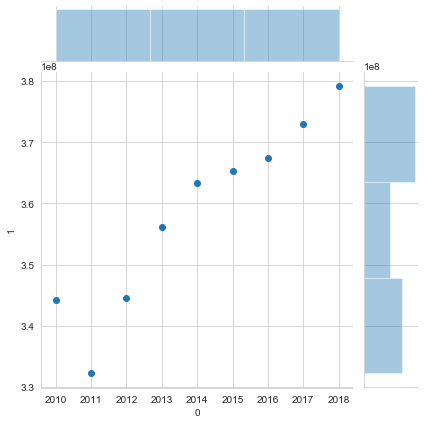

In [38]:
total_cross = []
for i in range(2010, 2019):
    total_cross.append([i,border_cross[border_cross['Date'].dt.year==i]['Value'].sum()])
#print(total_cross)
total = pd.DataFrame(total_cross)
#print(total)
sns.jointplot(x=total[0],y=total[1])

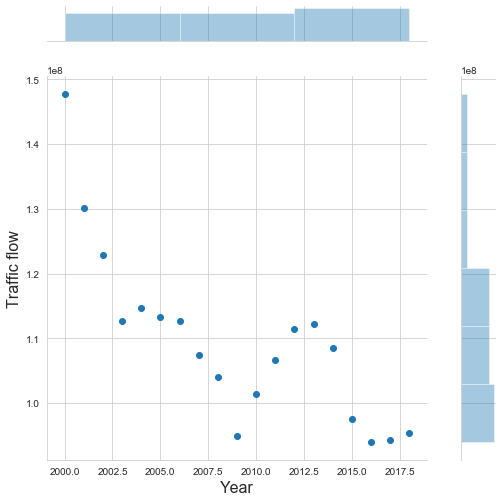

In [65]:
total_cross = []
for i in range(2000, 2019):
    total_cross.append([i,border_cross[(border_cross['Date'].dt.year==i) & \
                                       ((border_cross['Border']=='US-Canada Border'))]['Value'].sum()])
#print(total_cross)
total = pd.DataFrame(total_cross)
#print(total)
plot1 = sns.jointplot(x=total[0],y=total[1], height = 7, ratio = 6, space = 1)
plot1.set_axis_labels('Year', 'Traffic flow', fontsize=16)

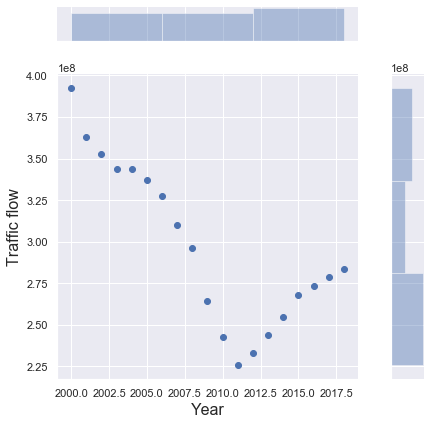

In [113]:
total_cross_mex = []
for i in range(2000, 2019):
    total_cross_mex.append([i,border_cross[(border_cross['Date'].dt.year==i) & \
                                       ((border_cross['Border']=='US-Mexico Border'))]['Value'].sum()])
#print(total_cross)
total_mex = pd.DataFrame(total_cross_mex)
#print(total_mex)
plot2 = sns.jointplot(x=total_mex[0],y=total_mex[1], space = 1)
plot2.set_axis_labels('Year', 'Traffic flow', fontsize=16)

In [93]:
state_list = border_cross['State'].unique()
#print(border_cross['Date'].unique())
#for k in state_list:
state_sum = []
for l in range(2011, 2019):
    state_sum.append([l,border_cross[(border_cross['State']=='Minnesota') \
                                       & (border_cross['Date'].dt.year==i)]['Value'].sum()])

In [80]:
border_cross[(border_cross['State']=='Minnesota') & (border_cross['Date'].dt.year==2012)]['Value'].sum()

4056485

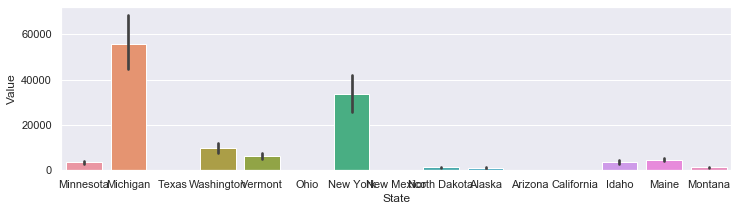

In [122]:
sns.set(rc={'figure.figsize':(12,3)})
g = sns.barplot(x=border_cross['State'],y=border_cross[(border_cross['Border']=='US-Canada Border') & \
                                                       (border_cross['Date'].dt.year==2010)]['Value'])
#border_cross[border_cross['Border']=='US-Canada Border']['Value']

Text(0.5, 1, 'border_cross.corr()')

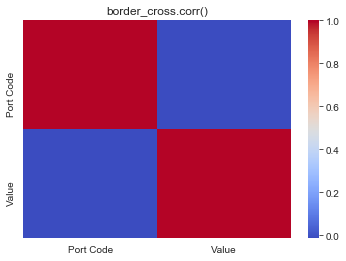

In [20]:
sns.heatmap(border_cross.corr(),cmap='coolwarm')
plt.title('border_cross.corr()')